<a name="cell-DvsA"></a> 

## 2.5 [Optional] Digital Versus Analog Computing ([Return to TOC](#cell-TOC))
--- 


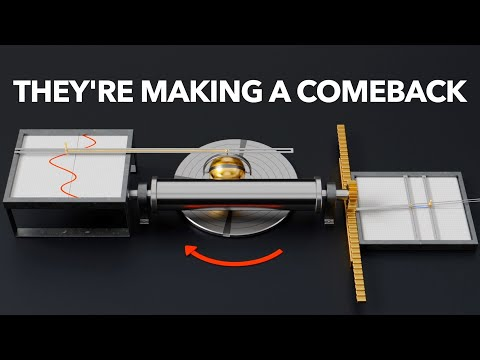

In [ ]:
from IPython.display import YouTubeVideo
# https://www.youtube.com/watch?v=IgF3OX8nT0w
YouTubeVideo('IgF3OX8nT0w', width=1024, height=512)

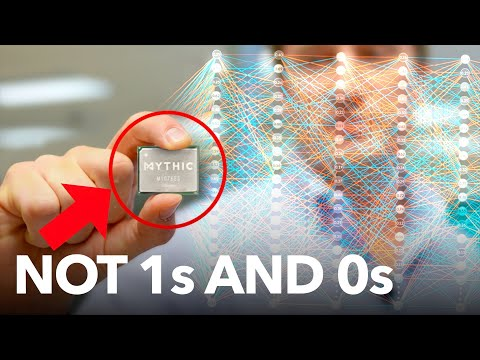

In [ ]:
# https://www.youtube.com/watch?v=GVsUOuSjvcg
YouTubeVideo('GVsUOuSjvcg', width=1024, height=512)

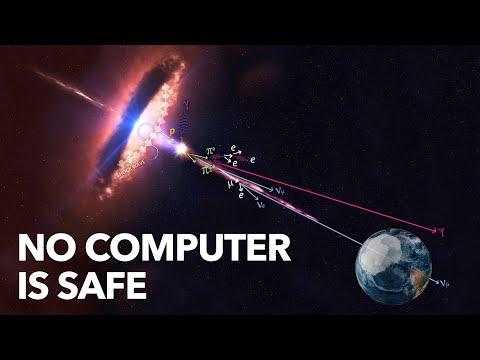

In [ ]:
# https://www.youtube.com/watch?v=AaZ_RSt0KP8
YouTubeVideo('AaZ_RSt0KP8', width=1024, height=512)

# Review the ***floating-point*** representation given in 
`STA410_W24_Week1_Extra_PseudorandomnesAndComputerRepresentation.ipynb`

In [1]:
! pip install bitstring # install a package not immediately available

In [4]:
import bitstring
bitstring.BitArray(float=2**0, length=64).bin # 01111111111 is the bias
# that's 2**10 - 1

'0011111111110000000000000000000000000000000000000000000000000000'

In [5]:
bitstring.BitArray(float=2**1, length=64).bin 
# 10000000000 is one more than the bias 01111111111

'0100000000000000000000000000000000000000000000000000000000000000'

Remember the "0" in the largest possible 64-bit floating point number `1.7976931348623157e+308`?

In [7]:
import numpy as np
np.finfo(float).max

1.7976931348623157e+308

In [2]:
# 1.7976931348623157e+308 is the largest representable floating point number
print(bitstring.BitArray(float=1.7976931348623157e+308, length=64).bin)
print(" ... that ^0^ there ...")
print("                        which is the last digit of the exponent...")

0111111111101111111111111111111111111111111111111111111111111111
 ... that ^0^ there ...
                        which is the last digit of the exponent...


Here's what happen's if that `0` becomes `1` (so that all exponent bits are `1`):

In [8]:
print('   1.7976931348623157e+308 + 1e+292')
print("= ", bitstring.BitArray(float=1.7976931348623157e+308, length=64).bin)
print(" +", bitstring.BitArray(float=2**1023 + 2**1022, length=64).bin)
print('= ', 1.7976931348623157e+308 + 2**1023)
print("= ", bitstring.BitArray(float = 1.7976931348623157e+308 + 2**1022, length=64).bin)
print(" no zero here ^ any more")
print("    but also all the significand bits don't matter any more and get set to 0")

   1.7976931348623157e+308 + 1e+292
=  0111111111101111111111111111111111111111111111111111111111111111
 + 0111111111101000000000000000000000000000000000000000000000000000
=  inf
=  0111111111110000000000000000000000000000000000000000000000000000
 no zero here ^ any more
    but also all the significand bits don't matter any more and get set to 0


Of course, so long as the value has not yet reached infinity, then all the *significand* digits are tracked:

In [9]:
# just picking some arbitrary numbers to add together... 
print(" ", bitstring.BitArray(float=.89e+308, length=64).bin)
print("+", bitstring.BitArray(float=.89e+308, length=64).bin)
print("=", bitstring.BitArray(float=.89e+308+.89e+308, length=64).bin)
print("=", .89e+308+.89e+308)

  0111111111011111101011110101111110001101000110010111010001111001
+ 0111111111011111101011110101111110001101000110010111010001111001
= 0111111111101111101011110101111110001101000110010111010001111001
= 1.78e+308


Because the *significand* bits do not need to be retained when representing `Inf`, they can be used to represent `NaN`; namely:

In [ ]:
print("0     ", bitstring.BitArray(float=0., length=64).bin)
print("1     ", bitstring.BitArray(float=1., length=64).bin)
print("np.Inf", bitstring.BitArray(float=np.Inf, length=64).bin)
print("np.NaN", bitstring.BitArray(float=np.NaN, length=64).bin)

so, to represent `NaN`
- all *exponent* bits are `1` (as with `Inf`)
- a `signficand` bit is `1` e.g., the first bit, is `1`

  (as opposed to `Inf`, where all the `signficand` bits are `0`)

See `STA410_W24_Week1_Extra_PseudorandomnesAndComputerRepresentation.ipynb`
for some examples of how Python handles these *special numbers*. 


<a name="cell-FPN-bit-mult"></a>
## 0.0.2 Bit arithmetic I: Multiplication (e.g., with `0` and  `1`) ([Return to TOC](#cell-TOC-FPN))
---

You can get a sense of arithmetic operations on bits by considering bit *multiplication* 
- $\Large \texttt{a} \times \texttt{b} = \displaystyle 2^{(\texttt{a}^{\text{expon}} - b \; + \; \texttt{b}^{\text{expon}} - b)} \times \overset{\normalsize \text{(including $sign$ bit)}}{\underbrace{\texttt{a}^{sign\text{if}} \times \texttt{b}^{sign\text{if}}}_{\normalsize \text{binary multiplication algorithm}}}$ 

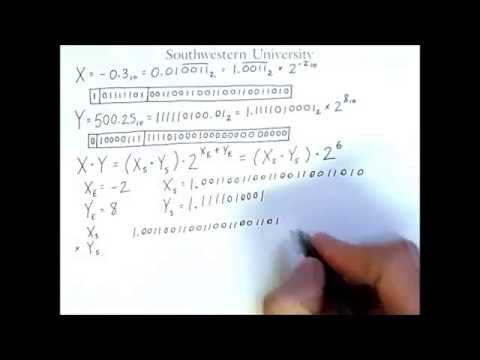

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('27JjUa-eu_E')

  - $\texttt{a} \times \texttt{1} = \texttt{a}$: multiplying floating-point number $\texttt{a}$ by *multiplicative identity element* $\texttt{1}$ just leaves `a`'s as it was.
    - $\texttt{1}^{\text{expon}} = b\quad$ i.e., the *bias* $b$, since the representation of $\texttt{b}$ is *normalized*
    - $\texttt{1}^{\text{signif}} = [1.]0 \quad$ since the leading *hidden bit* is `1`

    $\require{cancel} \Large \texttt{a} \times \texttt{1} = \displaystyle 2^{(\texttt{a}^{\text{expon}} - b + \cancel{b - b})} \times \texttt{a}^{sign\text{if}} \times 1 = \texttt{a}$
  
  - $\texttt{a} \times \texttt{0} = \texttt{0}$: multiplying floating-point number $\texttt{a}$ by *multiplicative absorbing element* $\texttt{0}$ is $\texttt{0}$.

    - $\texttt{0}^{\text{expon}} = 0 \quad$ because $0$ is a *special reserved representation*
    - $\texttt{0}^{\text{signif}} = [0.]0 \quad$ since the leading *hidden bit* of $0$ is `0` since  $\texttt{0}^{\text{expon}} = 0$ and so $\texttt{0}^{\text{signif}}$ is *unnormalized*.

    $\Large \texttt{a} \times \texttt{0} = \displaystyle 2^{\overbrace{\texttt{a}^{\text{expon}}}^{\leq b} - b - 0 - b)} \times \texttt{a}^{sign\text{if}} \times \texttt{0} = \texttt{0}$

    since $\texttt{a}^{\text{expon}} - b - 0 \leq 0$, but the exponent cannot represent a negative number (prior to subtraction by the *bias* $b$).

In fact, we can multiply two non-zero numbers together and get 0, **which should concern you**:

<a name="cell-FPN-bit-inf"></a>
## 0.0.3 Bit arithmetic II: Special "Numbers" $\pm\infty$ and NaN ([Return to TOC](#cell-TOC-FPN))
---

Numeric values are not the only floating-point elements; namely, `NaN` and `Inf` are floating-point elements, too:

In [15]:
print("0     ", bitstring.BitArray(float=0., length=64).bin)
print("1     ", bitstring.BitArray(float=1., length=64).bin)
print("np.Inf", bitstring.BitArray(float=np.Inf, length=64).bin)
print("np.NaN", bitstring.BitArray(float=np.NaN, length=64).bin)

0      0000000000000000000000000000000000000000000000000000000000000000
1      0011111111110000000000000000000000000000000000000000000000000000
np.Inf 0111111111110000000000000000000000000000000000000000000000000000
np.NaN 0111111111111000000000000000000000000000000000000000000000000000


And just to prove it:

In [16]:
print(2. * 1.7976931348623157e+308)
type(2. * 1.7976931348623157e+308)
# Note that this does not report an error like `10.**309` did
# And compare this to: `2. * np.finfo(float).max`, with type `numpy.float64`

inf


float

Just like `0`, `NaN` and `Inf` have *special reserved representations*. 

Remember the "0" in the largest possible 64-bit floating point number `1.7976931348623157e+308`?

<a name="cell-FPN-bit-add"></a>
## 0.0.4 Bit arithmetic III: Breaking Addition ([Return to TOC](#cell-TOC-FPN))
---

We previously added some floating-point numbers together above, but let's look closer at bit arithmetic addition

$$\Large \texttt{a}+\texttt{b} = 2^{\texttt{a}^{\text{expon}}} \left(\texttt{a}^{\text{sign[if]}} + 2^{(\texttt{b}^{\text{expon}}- \texttt{a}^{\text{expon}})} \texttt{b}^{\text{sign[if]}}\right) \text{ for } \texttt{a} \geq \texttt{b}$$

- $\texttt{b}$'s significand is first put on the same scale as $\texttt{a}$, and then added to $\texttt{a}$.

- $\texttt{a} + \texttt{0}$ = $\texttt{a}$
  - because $\texttt{0}$ has no significand bits to add to $\texttt{a}$
- $\texttt{a} + \texttt{b} = \texttt{0}$ if $\texttt{b} = -\texttt{a}$ 
  - because "$-$" flips the sign bit so then $\texttt{a} + \texttt{b} = \texttt{a} - \texttt{a}$ and so all the significand bits cancel in the subtraction

- $\texttt{a} + \texttt{b} = \texttt{a}$ any time $\texttt{b}^{\text{expon}} - \texttt{a}^{\text{expon}} \leq -52$ 

  - because there are 52 signifcand bits, and $2^{-52}$ times a signifcand shifts the bits in the significand to the right $52$ times, which replaces all significand values with `0`'s.

**The fact that $\texttt{a} + \texttt{b} = \texttt{a}$ should concern you:**

In [10]:
print(' ', '1.7976931348623157e-308 * 1.7976931348623157e-308')
print('=', bitstring.BitArray(float=1.7976931348623157e-308, length=64).bin, '*', 
      bitstring.BitArray(float=1.7976931348623157e-308, length=64).bin)
print('=', 1.7976931348623157e-308*1.7976931348623157e-308)
print('=', bitstring.BitArray(float=1.7976931348623157e-308*1.7976931348623157e-308, length=64).bin)

  1.7976931348623157e-308 * 1.7976931348623157e-308
= 0000000000001100111011010100001011101100100010000101110110011101 * 0000000000001100111011010100001011101100100010000101110110011101
= 0.0
= 0000000000000000000000000000000000000000000000000000000000000000


The smallest number greater than $0$ we can represent, using the ***unnormalized*** representation of the "graceful underflow trick" (where when $p=−1023$ and the leading *hidden digit* is taken to be `0`) is

In [ ]:
1.7976931348623157e-308*2**-52

which can be confirmed with

In [11]:
print(np.nextafter(0., 1.))
print(bitstring.BitArray(float=np.nextafter(0., 1.), length=64).bin)

5e-324
0000000000000000000000000000000000000000000000000000000000000001


In [12]:
# The largest number number representable using graceful underflow is
print(np.nextafter(2**-1022., 0.))
print(bitstring.BitArray(float=np.nextafter(2**-1022., 0.), length=64).bin)

2.225073858507201e-308
0000000000001111111111111111111111111111111111111111111111111111
